In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from astropy.table import Table
import numpy as np
from scipy.interpolate import interp1d

In [2]:
def read_txt(path):
    f=open(path)
    st=f.read()
    f.close()
    a=st.split('\n')
    x=[]
    x_err=[]
    y=[]
    y_err=[]
    for i in range(3,len(a)-1):
        b=a[i].split(' ')
        x.append(float(b[0]))
        x_err.append(float(b[1]))
        y.append(float(b[2]))
        y_err.append(float(b[3]))
    x=np.array(x)
    y=np.array(y)
    x_err=np.array(x_err)
    y_err=np.array(y_err)
    return x,x_err,y,y_err

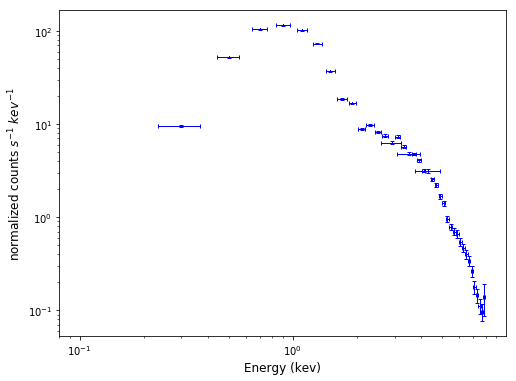

In [11]:
if __name__=='__main__':
    public_path=r'energy_lgrb/energy_'
    energy=np.arange(0,8.2,0.2)
    E_e=np.zeros(len(energy)-1)
    Count=np.zeros(len(energy)-1)
    Count_e=np.zeros(len(energy)-1)
    for i in range(1,38):
        if i<10:
            path=public_path+'0'+str(i)+'.txt'
        else:
            path=public_path+str(i)+'.txt'
        x,x_err,y,y_err=read_txt(path)
        counts=[]
        counts_err=[]
        energy_e=[]
        for j in range(1,len(energy)):
            x_list = []
            value1=0
            value2=0
            value3=0
            for m in range(len(x)):
                if x[m] >= energy[j-1] and x[m] < energy[j]:
                    x_list.append(x[m])
                    value1 = value1+y[m]
                    value2 = value2+(y_err[m]**2)
                    value3 = value3+(x_err[m]**2)
            counts.append(value1)
            counts_err.append(value2)
            #if len(x_list) == 0:
            #    energy_e.append(0)
            #else:
            #    energy_e.append(np.std(x_list))
            energy_e.append(value3)
        energy_e=np.array(energy_e)
        counts=np.array(counts)
        counts_err=np.array(counts_err)
        E_e=E_e+energy_e
        Count=Count+counts
        Count_e=Count_e+counts_err
    E=(energy[1:]+energy[:-1])/2.
    fig=plt.figure(figsize=[8,6])
    ax=fig.add_subplot(111)
#    ax.scatter(E,Count,c='blue',marker='o',s=3)
    ax.errorbar(E,Count/38, yerr=(Count_e/38)**0.5, xerr=(E_e/38)**0.5, fmt=',', color='b', elinewidth=1, capsize=2)
    ax.set_xlabel('Energy (kev)',fontsize=12)
    ax.set_yscale('log')
    ax.set_xscale('log')
#    ax.set_ylim(10**(-2),10**3)
#    ax.set_xlim(10**(-1),10**1)
    ax.set_ylabel('normalized counts $s^{-1}$ $kev^{-1}$',fontsize=12)
#    ax.set_ylim(0,12)
plt.show()

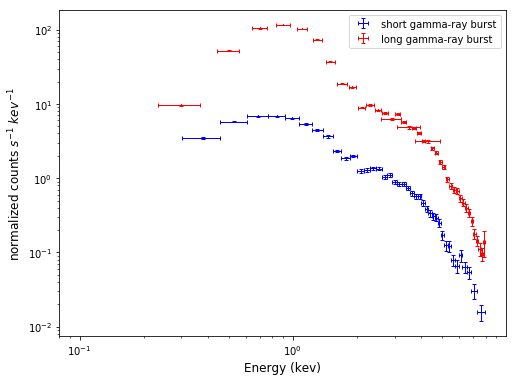

In [13]:
# 长短暴能谱对比

energy_sgrb = pd.read_csv("energy_sgrb.csv")  
x = energy_sgrb['x']
y = energy_sgrb['y']
xerr = energy_sgrb['xerr']
yerr = energy_sgrb['yerr']

fig=plt.figure(figsize=[8,6])
ax=fig.add_subplot(111)
#ax.scatter(E,Count,c='blue',marker='o',s=3)
ax.errorbar(x,y, yerr=yerr, xerr=xerr, fmt=',', color='b', elinewidth=1, capsize=2, label='short gamma-ray burst')
ax.errorbar(E,Count/38, yerr=(Count_e/38)**0.5, xerr=(E_e/38)**0.5, fmt=',', color='r', elinewidth=1, capsize=2, label='long gamma-ray burst')
ax.set_xlabel('Energy (kev)',fontsize=12)
ax.set_yscale('log')
ax.set_xscale('log')
#ax.set_ylim(10**(-2),10**3)
#ax.set_xlim(10**(-1),10**1)
ax.set_ylabel('normalized counts $s^{-1}$ $kev^{-1}$',fontsize=12)
#ax.set_ylim(0,12)
ax.legend()
plt.show()